## Minecraft Player Data Analysis Project  

![Minecraft](https://upload.wikimedia.org/wikipedia/en/b/b6/Minecraft_2024_cover_art.png)

## Introduction
#### Background Information
Video games have rapidly become one of the most influential forms of entertainment worldwide, attracting millions of players and creating vibrant online communities. Among the most popular is Minecraft, a sandbox game that offers unique insights into user behavior through its open-ended gameplay. A research group in Computer Science at UBC, led by Frank Wood, is collecting data about how people play video games. They record players' actions as they play through a MineCraft server, where the players activity is recorded as they navigate through the world. 

### Question:
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts, focusing particularly on age.
### Can age predict the hours played in this dataset?

* This dataset will help indicate whether age can predict the amount of time a Minecraft user plays for. t. Understanding this relationship can guide targeted recruitment, enhance user engagement strategies, personalize in-game recommendations, and potentially drive increased sales. Insights from this analysis may also inform how different age groups interact with game environments over time, helping optimize server resource allocation and future design decisions.



## Players Dataset Overview:
This dataset observes Minecraft user's gaming experience and contains information like player status, subscription, playtime, and demographics. 
* Number of observations (rows): 196
* Number of variables (columns): 7


## Columns in the Players Data Set:
### Numerical (dbl):
* `played_hours` - The number of hours the user has played.
* `Age`- the age of the player.

### Character (chr):
* `hashedEmail`- encrypted email for user identification.
* `name`- The name of the player.
* `gender`- Classified as either Male, Female, Non-binary, or Prefer not to say
* `experience`- The level of experience classified (Pro, Veteran, Regular, Amatuer, or Beginner)

### Logical (lgl)
* `subscribe`- Whether the player is subscribed (either TRUE or FALSE)



## Sessions Dataset Overview:
This dataset tracks player's sessions, such as hashed email, start times and end times (one is human-readable, the other is UNIX timestamped).
* Number of observations (rows): 1535
* Number of variables (columns): 5


## Columns in the Sessions Data Set:

### Character (chr):
* `hashedEmail`- encrypted and anonymous user identification. 
* `start_time`- Session start time (DD/MM/YYYY Hour:Minute)
* `end_time`- Session end time (DD/MM/YYYY Hour:Minute)

### Numerical (dbl):
* `original_start_time`- UNIX timestamp of session start time.
* `original_end_time`- UNIX timestamp of session end time.


# Methods and Results
Firstly, we will load the necessary libraries required for this project

In [98]:
library(tidyverse)
library(tidymodels)
set.seed(123)

### Importing Datasets
We will use `read_csv` to import the datasets from Google Drive links

In [99]:
url<- "https://drive.google.com/uc?export=download&id=1QRsHcWfUyvOWJpKgwFCw3csjRN5NL1L3"
sessions<- read_csv(url)
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [100]:
url<- "https://drive.google.com/uc?export=download&id=1jv3p3Ai0a1pNS-hk7csk1I9l21fYy-_t"
players<-read_csv(url)
head(players)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


We will convert `played_hours` to `played_minutes` because some of the played hours are very low and close to zero, which means that if we were to run our analysis with `played_hours`, it would skew most of the data, and so, affect our analysis.

In [101]:
players<- players|>
mutate(played_minutes=(played_hours*60))

Before building our model, we need to first split the data into training and testing sets. To do this, we use `initial_split()` with a 70/30 ratio, which allows us to train the model on the majority of the data while still keeping enough for effective evaluation. We will also use `set.seed` to ensure that our results are reproducible.

In [102]:
set.seed(123)
players_split<- initial_split(players, prop=0.70, strata= played_minutes)
players_train<- training(players_split)
players_test<- testing(players_split)

In [103]:
players_train <- players_train|>
mutate(played_minutes= (played_hours*60))

Use `summarise` to find the mean played hours, played minutes, and age from the training set. We removed missing values from the dataset using the function `na.rm=TRUE`. This will help us calculate accurate statistics and enhance the readability of our results.

In [104]:
mean_values<- players_train|>
summarise(
    mean_played_hours= mean(played_hours, na.rm=TRUE),
    mean_played_minutes=mean(played_minutes, na.rm=TRUE),
    mean_age= mean(Age, na.rm=TRUE))
mean_values

mean_played_hours,mean_played_minutes,mean_age
<dbl>,<dbl>,<dbl>
6.684559,401.0735,20.26119


We will now compute the summary statistics of the `players_train` data set. 

In [105]:
Summary_statistics_players <- players_train|>
summarise(
    min_played_hours= min(played_hours, na.rm=TRUE),
    min_played_minutes= min(played_minutes, na.rm=TRUE),
    min_age= min(Age, na.rm=TRUE),
    max_played_hours= max(played_hours, na.rm=TRUE),
    max_played_minutes=max(played_minutes, na.rm=TRUE),
   max_age= max(Age, na.rm=TRUE))
Summary_statistics_players

min_played_hours,min_played_minutes,min_age,max_played_hours,max_played_minutes,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,8,223.1,13386,50


In [106]:
players_train<- players_train|>
drop_na(Age, played_hours, played_minutes)
head(players_train)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,played_minutes
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,0
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,0
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,6
Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Nyla,Female,22,0
Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17,0
Veteran,TRUE,6f9acf8ea9956fe817895c78d10e1e25c11aba335a451e5b0322b073ee5008c4,0.0,Niamh,Non-binary,17,0


In [107]:
players_filtered<- filter(players_train, Age<30, played_hours>0 & played_hours<10)
head(players_filtered)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,played_minutes
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,6
Veteran,FALSE,951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd,0.1,Vivienne,Male,18,6
Amateur,TRUE,710148466b44cb02ba894aa9005a4892e619250ebd01153055d6c7578fc1ea10,0.1,Ayman,Male,23,6
Veteran,TRUE,d07befbac08be3d876d026ac0458651067001b39081d24724af3c95be76355e0,0.1,Yvette,Non-binary,17,6
Veteran,TRUE,577aa5f15468252b1c6f32dcd515012923476292e30f95e6b4128c770e993f92,0.1,Winston,Male,17,6
Amateur,TRUE,7c0ae28a5f85a515a8063f9ed989aa26c5ebcc64f6b7be2948c0b300c2c9bd47,0.1,Evangeline,Male,23,6


## Visualize the relationship through a scatter plot

We will now visualize the relationship between Minecraft user age and played minutes in a scatter plot. As the scatter plot did not have a linear relationship, we did not use linear regression, and thought that KNN regression would be more suitable. Since linear regression cannot fit the data well based on the current non-linear relationship, KNN would be the better choice, as it does not need to assume a straight-line (or any fixed shape) relationship, as it can make predictions based on the values of its nearest points in the data or plot. This makes KNN regression more suitable to complete our analysis. 

Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”


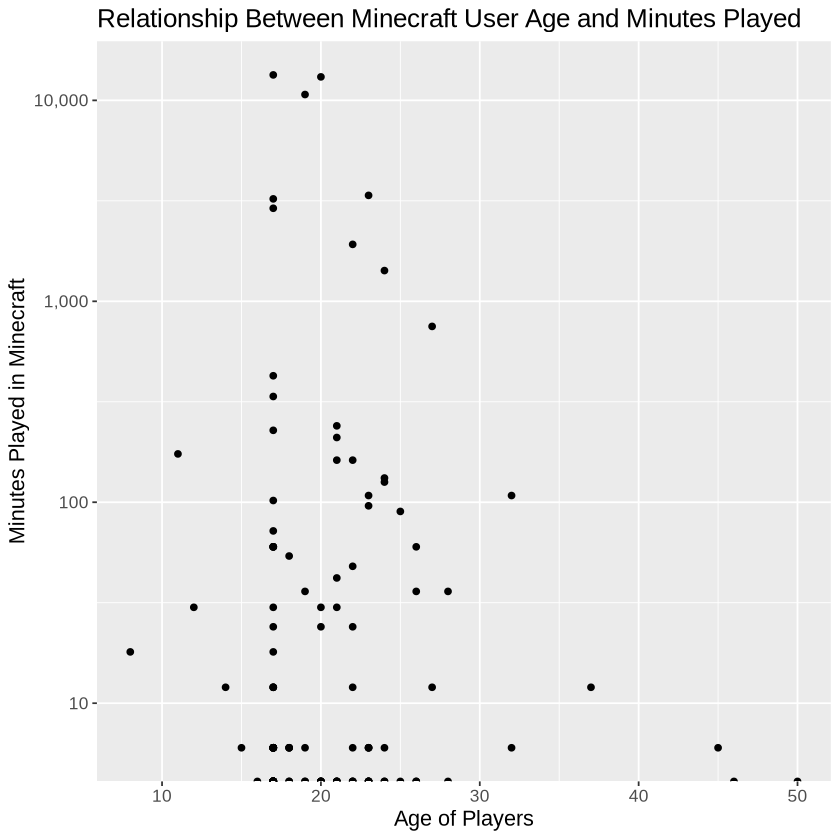

In [108]:
Minecraft_plot<- players_train|>
ggplot(aes(x=Age, y=played_minutes))+
geom_point()+
xlab("Age of Players")+
ylab("Minutes Played in Minecraft")+
scale_y_log10(labels = label_comma()) +
theme(text=element_text(size=13))+
ggtitle("Relationship Between Minecraft User Age and Minutes Played")
Minecraft_plot

In [109]:
players_recipe<- recipe(played_minutes~ Age, data=players_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

players_spec<- nearest_neighbor(weight_func= "rectangular", neighbors=tune())|>
set_engine("kknn")|>
set_mode("regression")

The code above defines the KNN regression model specification, where we specify the following things: 
- the weight function means that all neighbours would be weighed equally
- the tune function is to optimise the number of neighbours
- the set engine function specifies that we are using the knn package
- the set mode function specifies that the model will predict numeric outcome 

In [110]:
set.seed(123)
players_vfold<- vfold_cv(players_train, v=7, strata= Age)

In [111]:
players_wkflw<- workflow()|>
add_recipe(players_recipe)|>
add_model(players_spec)
players_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [112]:
gridvals<- tibble(neighbors=seq(from=1, to=20, by=3))

In [113]:
players_results<- players_wkflw|>
tune_grid(resamples= players_vfold, grid=gridvals)|>
collect_metrics()|>
filter(.metric== "rmse")
players_results

#Showing the row with the least RMSPE
players_min <- players_results|> 
    filter(mean == min(mean)) 
players_min 
#smallest RMSPE occurs when K=19

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,2050.669,7,625.7539,Preprocessor1_Model1
4,rmse,standard,1582.763,7,480.9663,Preprocessor1_Model2
7,rmse,standard,1644.120,7,451.1377,Preprocessor1_Model3
10,rmse,standard,1626.247,7,452.9707,Preprocessor1_Model4
13,rmse,standard,1620.301,7,456.0551,Preprocessor1_Model5
16,rmse,standard,1566.026,7,454.8843,Preprocessor1_Model6
19,rmse,standard,1544.818,7,445.7305,Preprocessor1_Model7


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
19,rmse,standard,1544.818,7,445.7305,Preprocessor1_Model7


We will evaluate how well the model is predicting unseen data and evaluate its RMSPE on the test data. We will retrain the KNN regression model on the entire training set using K=19. 

Then we will use `predict` to make predictions on the test data and use the `metrics` function to compute the summary of the regression quality. We specified regression with `set_mode` .

To verify, from the `kmin` function, we found that the lowest K value is 19.

In [114]:
kmin<- players_min|>
pull(neighbors)

In [115]:
players_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
set_engine("kknn") |>
set_mode("regression")

In [116]:
players_fit<- workflow()|>
add_recipe(players_recipe)|>
add_model(players_spec)|>
fit(data=players_train)

players_test = players_test |> filter(!is.na(Age),!is.na(played_minutes))

In [117]:
players_summary<- players_fit|>
predict(players_test) |>
bind_cols(players_test)|>
metrics(truth=Age, estimate= .pred)|>
filter(.metric=="rmse")
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,337.2057


The final model's test error is 337.2. Thus the error in our model is roughly 327.2. In this application, the RMSPE is large and suggests that our model is not the best at making predictions.

## Summary of what we found
As the model showed a high RMSE, it means that it struggled to accurately predict playtime based on age alone, which suggests that age is not a strong predictor (if used alone) of total Minecraft playtime. 

## Is this what we expected to find? 
Not really, as we thought that age would be a good indicator of total playtime. According to Clement (2024), younger generations (such as Gen Z or millenials) made up over half of the gaming population in the US (28% and 25% respectively), while older generations (such as Boomeres) played less frequently. However, as most players fell within a relatively narrow age range, it makes sense that age alone may not be able to explain much of the variation in total playtime. Other factors could have contributed and influenced total playtime outside of age, including but not limited to: personal habits, free time, and other behavioural factors. 

This next plot shows the predictions that our final model makes across the range of Ages in the Minecraft playcraft.

In [118]:
players_prediction_grid<- tibble(
    Age=seq(
                from = players_train |> select(Age) |> min(),
        to = players |> select(Age)|> max(na.rm=TRUE),
        by = 10))

In [119]:
players_preds <- players_fit |>
  predict(players_prediction_grid) |>
  bind_cols(players_prediction_grid)

Warning message in scale_y_log10(labels = dollar_format()):
“log-10 transformation introduced infinite values.”


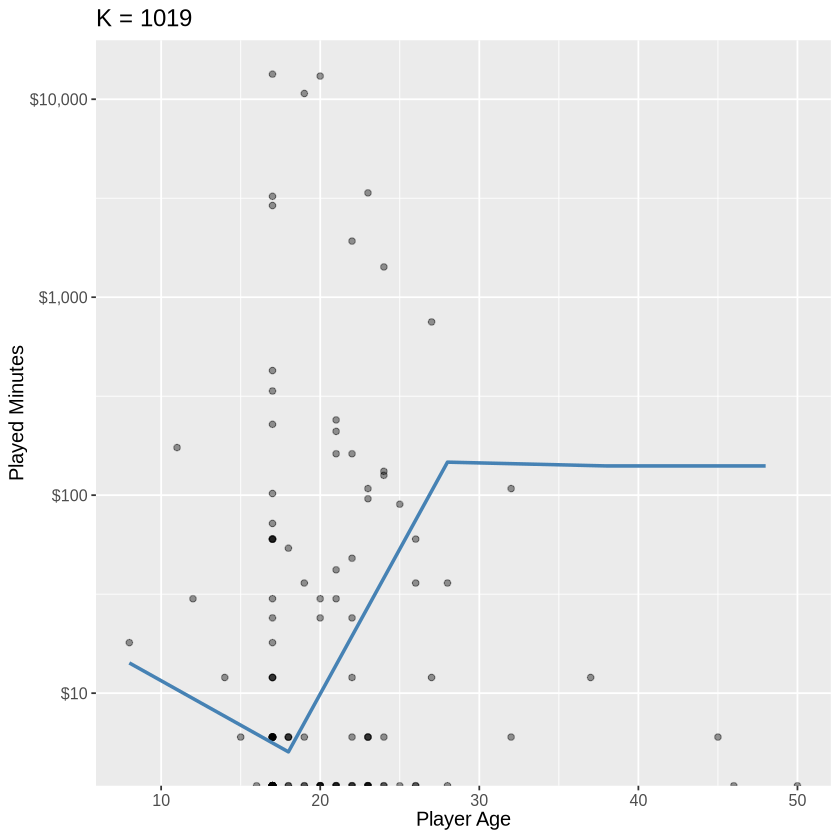

In [120]:

plot_final <- ggplot(players_train, aes(x = Age, y = played_minutes)) +
  geom_point(alpha = 0.4) +
  geom_line(data = players_preds,
            mapping = aes(x = Age, y = .pred),
            color = "steelblue",
            linewidth = 1) +
  xlab("Player Age") +
  ylab("Played Minutes") +
scale_y_log10(labels = dollar_format())+
  ggtitle(paste0("K = 10", kmin)) +
  theme(text = element_text(size = 12))

plot_final

## Impacts of these findings: 
1. Suggests that age alone is not a strong predictor of player engagement, specifically in total playtime
- This can inform game develoeprs that they cannot fully rely on age when making decision decisions or customising player experiences.

2. Can impact user segmentation and personalisation
- If age doesn't fully predict high or low playtime, game designers may need to focus on in-game behaviours or preferences to engage different player types

3. Can contribute to equity and accessibility in games 
- If age is not a major contributor to high playing time, then it reinforces the idea that good game design should work well for all age ranges
- Engagement barriers may be more related to game experience or playing style compared to the users age


## What questions can these findings raise? 
1. What other variables are better predictors of playtime (ie: preffered game mode, gender, experience level)?
2. If you combine several variables, does it improve prediction, for example by combining age and experience level?
3. Is there different engagement levels when it comes to different age groups? For example, do younger age groups play more competitively than older age groups?
4. How does total playtime relate to player satisfaction, as high play time doesn't always equal high enjoyment.
5. Is there a non linear relationship between the age groups and the total playtime? For example, the overall relationship between age and playtime may be weak, but in certain age groups (ie: younger age groups like Gen Z), it may be stronger.

These questions can help us improve our predictive model while also helping us go into more depth about understanding which types of players influence the total playtime.

<div align="center">
<strong> References <strong>
</div>

Clement, J. (2024, May). Distribution of video gamers in the United States in 2023, by generation. Statista. https://www.statista.com/statistics/189582/age-of-us-video-game-players/